In [16]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import sys
sys.path.append('..')
from dataset import batcher

In [18]:
INPUT_SHAPE = (224, 224, 3)
BUCKET = False

TFRECORDS_DIR = '../data/lsms_tfrecords/'

In [39]:
# Split dataset
train_batcher = batcher.Batcher(
    image_shape=INPUT_SHAPE, bucket=BUCKET, batch_size=4559, shuffle=False, repeat=1, split="train"
).get_dataset()

val_batcher = batcher.Batcher(
    image_shape=INPUT_SHAPE, bucket=BUCKET, batch_size=1302, shuffle=False, repeat=1, split="val"
).get_dataset()

test_batcher = batcher.Batcher(
    image_shape=INPUT_SHAPE, bucket=BUCKET, batch_size=652, shuffle=False, repeat=1, split="test"
).get_dataset()

splits = {'Train Split': train_batcher, 'Validation Split': val_batcher, 'Test Split': test_batcher}

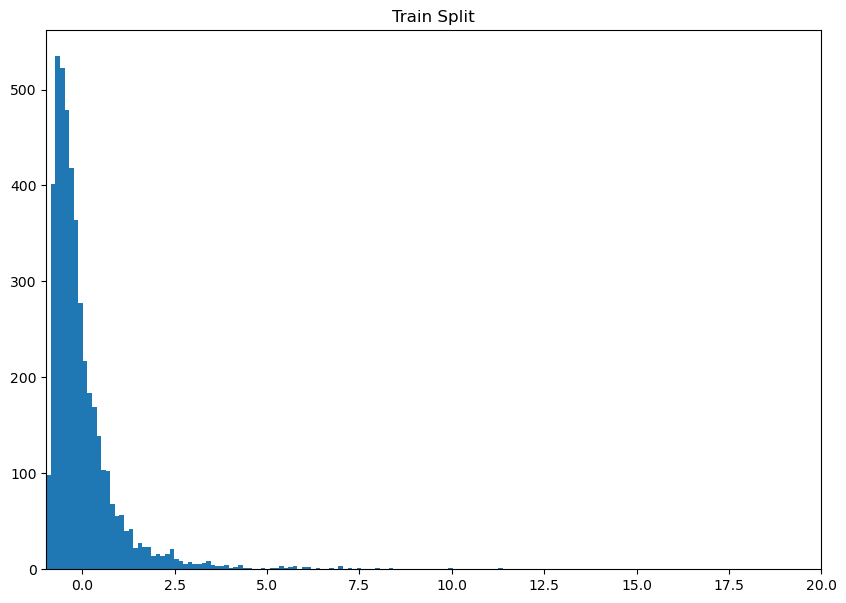

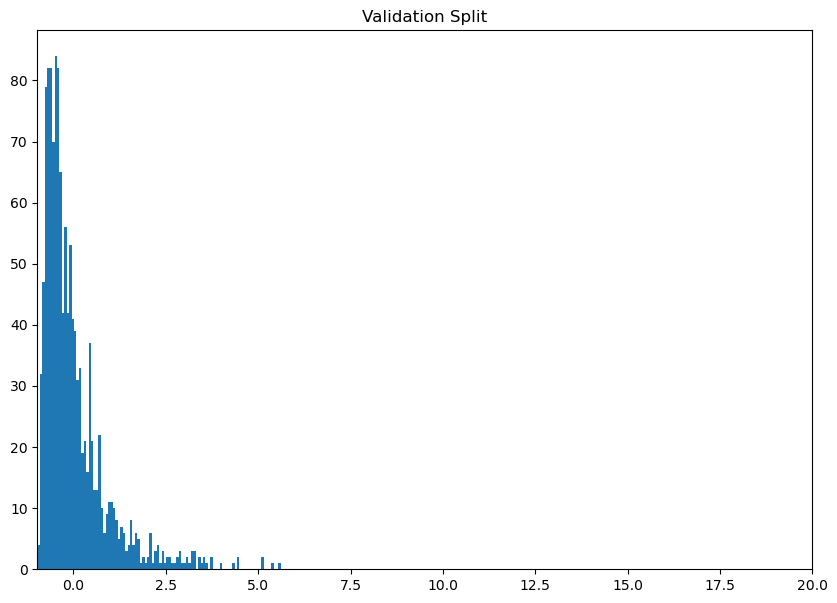

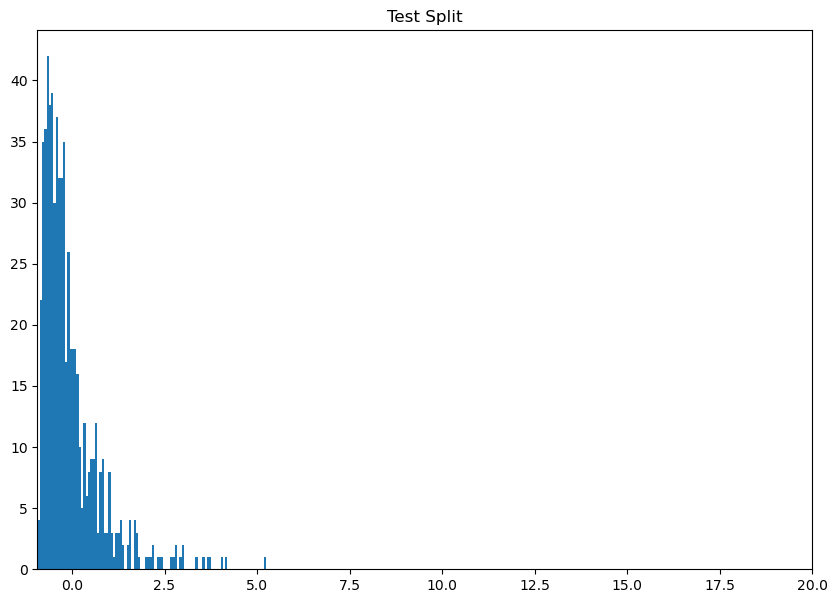

In [40]:
# Consumption histograms
for s_batcher in splits.items():
    consumption = []
    for x, y in s_batcher[1]:
        consumption.append(y)
    consumption = np.squeeze(consumption)
    
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(consumption, bins = 100)
    
    
    plt.title(s_batcher[0])
    plt.xlim([np.min(consumption), 20])
    plt.show()


In [46]:
imgs = []
for x, y in test_batcher:
    imgs.append(x)
    print(np.shape(x))

imgs = np.squeeze(imgs)
print(imgs)

(652, 224, 224, 3)
[[[[ 0.9036384   0.7464437   0.6014482 ]
   [ 0.210326    0.19968084  0.15300368]
   [ 0.6991112   0.43557224  0.2641613 ]
   ...
   [ 1.2485615   0.5594153   0.4633185 ]
   [ 1.3901128   0.7826698   0.60716933]
   [ 1.4346004   0.8353242   0.42980775]]

  [[ 1.0723444   0.9642221   0.70170766]
   [ 0.92848206  0.7708752   0.72922474]
   [ 0.3027675   0.21484512  0.13229795]
   ...
   [ 0.8961274   0.42967492  0.12521435]
   [ 0.24152501 -0.3361299  -0.45700034]
   [ 0.48880634 -0.03031349 -0.2529391 ]]

  [[ 1.242206    1.0244588   0.8346609 ]
   [ 1.2006073   1.1011236   0.84773827]
   [ 0.711822    0.49580893  0.45378298]
   ...
   [ 0.38018766  0.07836501 -0.13142872]
   [ 0.21263704 -0.29232156 -0.36082736]
   [ 0.1872155  -0.29779774 -0.3267717 ]]

  ...

  [[ 0.67311203  0.54972696  0.28895378]
   [ 1.0711889   0.70600504  0.54205513]
   [ 0.5292497   0.32099643  0.36551082]
   ...
   [-1.4310912  -1.573718   -1.5140866 ]
   [-1.3866036  -1.6529102  -1.6162534